In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ripple_heterogeneity.utils import functions,loading
from matplotlib.ticker import AutoMinorLocator

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [294]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "svg.fonttype": 'none'
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

# plt.rcParams['svg.fonttype'] = 'none'

%config InlineBackend.figure_format = 'retina'

fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\project_log'

In [55]:
# basepaths = ['A:/Data/GrosmarkAD/Cicero/Cicero_09012014',
#     'A:/Data/GrosmarkAD/Cicero/Cicero_09102014',
#     'A:/Data/GrosmarkAD/Cicero/Cicero_09172014',
#     'A:/Data/GrosmarkAD/Buddy/Buddy_06272013',
#     'A:/Data/GrosmarkAD/Achilles/Achilles_10252013',
#     'A:/Data/GrosmarkAD/Achilles/Achilles_11012013',
#     'A:/Data/GrosmarkAD/Gatsby/Gatsby_08282013',
#     'A:/Data/GrosmarkAD/Gatsby/Gatsby_08022013']

df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
df = df.loc[df['basepath'].str.contains("GrosmarkAD", case=False)]
df

,Unnamed: 0,basepath,basename
97,97,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,Achilles_10252013
98,98,Z:\Data\GrosmarkAD\Achilles\Achilles_11012013,Achilles_11012013
99,99,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,Buddy_06272013
100,100,Z:\Data\GrosmarkAD\Cicero\Cicero_09012014,Cicero_09012014
101,101,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,Cicero_09102014
102,102,Z:\Data\GrosmarkAD\Cicero\Cicero_09172014,Cicero_09172014
103,103,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08022013,Gatsby_08022013
104,104,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,Gatsby_08282013


In [370]:
swr_unit_metric = pd.DataFrame()
for basepath in df.basepath:

    temp_swr_unit_metric = loading.load_SWRunitMetrics(basepath)
    temp_cell_metrics,_ = loading.load_cell_metrics(basepath)
    temp_df_rem_shift,_ = loading.load_theta_rem_shift(basepath)

    for _ in range(temp_swr_unit_metric.epoch.nunique()-1):
        temp_cell_metrics = temp_cell_metrics.append(temp_cell_metrics,ignore_index=True)
    
    temp_swr_unit_metric['deepSuperficial'] = temp_cell_metrics.deepSuperficial
    temp_swr_unit_metric['brainRegion'] = temp_cell_metrics.brainRegion
    temp_swr_unit_metric['putativeCellType'] = temp_cell_metrics.putativeCellType
    temp_swr_unit_metric['basepath'] = basepath

    for _ in range(temp_swr_unit_metric.epoch.nunique()-1):
        temp_df_rem_shift = temp_df_rem_shift.append(temp_df_rem_shift,ignore_index=True)

    temp_swr_unit_metric['rem_shift'] = temp_df_rem_shift.rem_shift
    temp_swr_unit_metric['non_rem_shift'] = temp_df_rem_shift.non_rem_shift

    swr_unit_metric = swr_unit_metric.append(temp_swr_unit_metric,ignore_index=True)
    

swr_unit_metric

,particip,FRall,FRparticip,nSpkAll,nSpkParticip,epoch,deepSuperficial,brainRegion,putativeCellType,basepath,rem_shift,non_rem_shift
0,0.247762,2.243959,8.796279,0.378930,1.529412,pre,Deep,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,1,0
1,0.950239,21.025406,21.951543,3.550489,3.736415,pre,Deep,lCA1,Narrow Interneuron,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,0,1
2,0.264210,2.155187,8.099858,0.363939,1.377463,pre,Deep,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,1,0
3,0.048928,0.387145,7.966102,0.065376,1.336170,pre,Deep,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,1,0
4,0.069540,0.548660,7.606365,0.092650,1.332335,pre,Deep,lCA1,Narrow Interneuron,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2479,0.941430,23.021563,24.336811,3.800398,4.036835,post,Deep,lCA1,Narrow Interneuron,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,1,0
2480,0.927161,21.587301,22.960611,3.563630,3.843593,post,Deep,rCA1,Narrow Interneuron,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,0,1
2481,0.980421,37.773254,37.985447,6.235606,6.360129,post,Deep,rCA1,Narrow Interneuron,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,0,1
2482,1.000000,74.429853,73.438863,12.286876,12.286876,post,Deep,rCA1,Narrow Interneuron,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,0,1


In [57]:
print(swr_unit_metric[swr_unit_metric.epoch=="pre"].shape)
print(swr_unit_metric[swr_unit_metric.epoch=="pre"].brainRegion.value_counts())
print(swr_unit_metric[swr_unit_metric.epoch=="pre"].putativeCellType.value_counts())
print(swr_unit_metric[swr_unit_metric.epoch=="pre"].basepath.value_counts())

(828, 12)
rCA1    445
lCA1    383
Name: brainRegion, dtype: int64
Pyramidal Cell        645
Narrow Interneuron    177
Wide Interneuron        6
Name: putativeCellType, dtype: int64
Z:\Data\GrosmarkAD\Achilles\Achilles_10252013    275
Z:\Data\GrosmarkAD\Cicero\Cicero_09102014        105
Z:\Data\GrosmarkAD\Achilles\Achilles_11012013    104
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08022013         80
Z:\Data\GrosmarkAD\Cicero\Cicero_09012014         73
Z:\Data\GrosmarkAD\Cicero\Cicero_09172014         72
Z:\Data\GrosmarkAD\Buddy\Buddy_06272013           68
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013         51
Name: basepath, dtype: int64


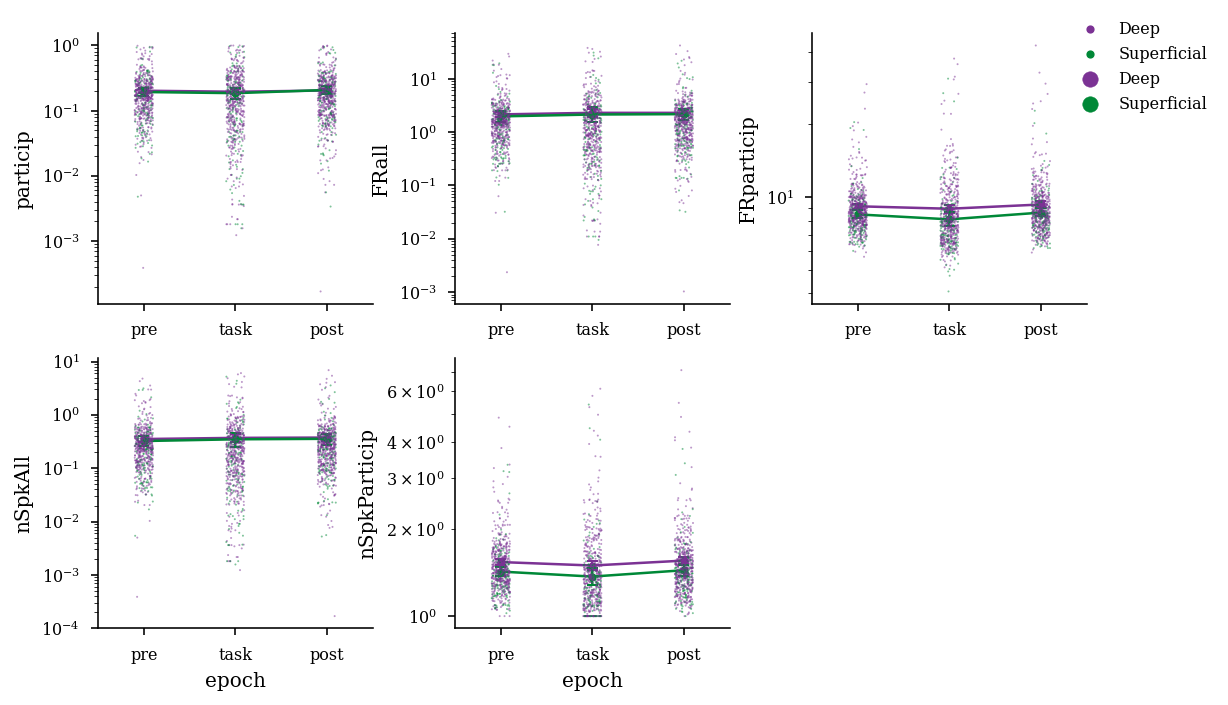

In [58]:
def plot_paired_plot(df,y,group_colors,ax,x="epoch",hue="deepSuperficial"):
    sns.pointplot(
            data=df,
            x=x, 
            y=y, 
            hue=hue,
            ci=95,
            capsize=.1, 
            hue_order=group_colors.keys(), 
            kind="point",
            ax=ax,
            scale=.5,
            errwidth=1
            ) 
    sns.stripplot(x=x, y=y,hue=hue,hue_order=group_colors.keys(),
        data=df,size=1,linewidth=0,ax=ax,alpha=.5)

fig, axs = plt.subplots(2,3, figsize=functions.set_size('thesis', fraction=1.5, subplots=(3, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=.3)
axs = axs.ravel()

group_colors = {"Deep": '#7b3294',
            'Superficial': '#008837'} 
sns.set_palette(sns.color_palette(group_colors.values()))

idx = (swr_unit_metric.putativeCellType=="Pyramidal Cell")

plot_paired_plot(swr_unit_metric[idx],"particip",group_colors,axs[0])
plot_paired_plot(swr_unit_metric[idx],"FRall",group_colors,axs[1])
plot_paired_plot(swr_unit_metric[idx],"FRparticip",group_colors,axs[2])
plot_paired_plot(swr_unit_metric[idx],"nSpkAll",group_colors,axs[3])
plot_paired_plot(swr_unit_metric[idx],"nSpkParticip",group_colors,axs[4])

axs[0].legend("",frameon=False)
axs[1].legend("",frameon=False)
axs[3].legend("",frameon=False)
axs[4].legend("",frameon=False)

axs[2].legend(loc='best', bbox_to_anchor=(.9, 0., 0.5, 1.1),frameon=False)
    
for i in range(6):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())

axs[5].axes.get_xaxis().set_ticks([])
axs[5].axes.get_yaxis().set_ticks([])

right_side = axs[5].spines["left"]
right_side.set_visible(False)
top_side = axs[5].spines["bottom"]
top_side.set_visible(False)

axs[0].set_xlabel("")
axs[1].set_xlabel("")
axs[2].set_xlabel("")

axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")
axs[3].set_yscale("log")
axs[4].set_yscale("log")

# plt.savefig(os.path.join(fig_save_path,'novel_task_pre_task_post.pdf'),dpi=300,bbox_inches='tight')

In [344]:
swr_unit_metric.loc[swr_unit_metric.rem_shift == 1,'rem_shifting'] = "shifting"
swr_unit_metric.loc[swr_unit_metric.non_rem_shift == 1,'rem_shifting'] = "non_shifting"
swr_unit_metric

,particip,FRall,FRparticip,nSpkAll,nSpkParticip,epoch,deepSuperficial,brainRegion,putativeCellType,basepath,rem_shift,non_rem_shift,rem_shifting
0,0.247762,2.243959,8.796279,0.378930,1.529412,pre,Deep,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,1,0,shifting
2,0.264210,2.155187,8.099858,0.363939,1.377463,pre,Deep,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,1,0,shifting
3,0.048928,0.387145,7.966102,0.065376,1.336170,pre,Deep,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,1,0,shifting
6,0.239017,2.042989,8.448438,0.344993,1.443380,pre,Deep,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,1,0,shifting
8,0.084947,0.694148,8.007605,0.117218,1.379902,pre,Deep,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,1,0,shifting
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,0.286710,3.139898,10.732203,0.518334,1.807870,post,Deep,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,1,0,shifting
2475,0.344782,3.114771,8.944812,0.514186,1.491338,post,Deep,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,0,0,NaN
2476,0.243571,2.162951,8.742600,0.357060,1.465940,post,Deep,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,1,0,shifting
2477,0.259665,2.400152,9.108321,0.396217,1.525879,post,Deep,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,1,0,shifting


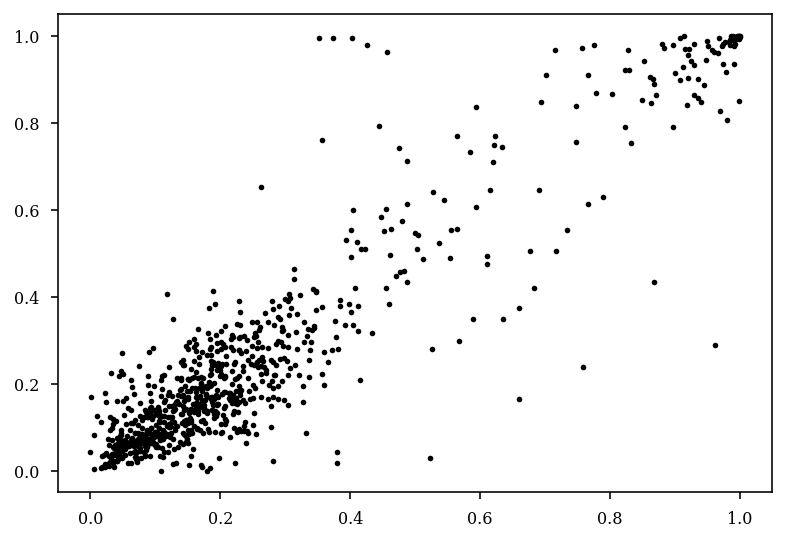

In [379]:
plt.plot(swr_unit_metric[swr_unit_metric.epoch=="pre"].particip,
swr_unit_metric[swr_unit_metric.epoch=="post"].particip,'.k')


In [399]:
swr_unit_metric[(swr_unit_metric.epoch=="pre") & (swr_unit_metric.deepSuperficial=="Superficial")]

# swr_unit_metric.deepSuperficial.unique()

,particip,FRall,FRparticip,nSpkAll,nSpkParticip,epoch,deepSuperficial,brainRegion,putativeCellType,basepath,rem_shift,non_rem_shift
12,0.252134,2.156420,8.363128,0.364147,1.444261,pre,Superficial,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,0,0
15,0.303560,2.472054,8.105090,0.417447,1.375171,pre,Superficial,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,1,0
31,0.189881,1.515289,7.732138,0.255882,1.347588,pre,Superficial,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,0,1
37,0.049552,0.337827,6.726911,0.057048,1.151261,pre,Superficial,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,0,0
39,0.033729,0.252754,7.472832,0.042682,1.265432,pre,Superficial,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2340,0.028343,0.184959,6.535727,0.030723,1.083969,pre,Superficial,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,0,0
2341,0.059065,0.419413,6.974255,0.069667,1.179487,pre,Superficial,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,0,1
2342,0.046300,0.306094,6.508561,0.050844,1.098131,pre,Superficial,lCA1,Pyramidal Cell,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,0,1
2343,0.084163,0.541851,6.357117,0.090004,1.069409,pre,Superficial,lCA1,Narrow Interneuron,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,1,0


In [518]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cell_idx = swr_unit_metric.putativeCellType == "Pyramidal Cell"

X = swr_unit_metric[(swr_unit_metric.epoch=="pre") & cell_idx][["particip","FRall","FRparticip","nSpkAll","nSpkParticip"]].values
y = swr_unit_metric[(swr_unit_metric.epoch=="pre") & cell_idx].deepSuperficial.values
bad_idx = np.any(np.isnan(X),axis=1) | np.any(np.isinf(X),axis=1)
X = X[~bad_idx,:]
y = y[~bad_idx]
# y = ((y == "Deep")*1) + 1

clf = LogisticRegression(random_state=0,class_weight = 'balanced').fit(X, y)
# print(clf.score(X, y))

X = swr_unit_metric[(swr_unit_metric.epoch=="post") & cell_idx][["particip","FRall","FRparticip","nSpkAll","nSpkParticip"]].values
y = swr_unit_metric[(swr_unit_metric.epoch=="post") & cell_idx].deepSuperficial.values
bad_idx = np.any(np.isnan(X),axis=1) | np.any(np.isinf(X),axis=1)
X = X[~bad_idx,:]
y = y[~bad_idx]
# y = ((y == "Deep")*1) + 1

print(clf.score(X, y))

matrix = confusion_matrix(y, clf.predict(X),labels=["Deep","Superficial"])
print(matrix)

report = classification_report(y, clf.predict(X))
print(report)

# clf.predict_proba(X)

0.5714285714285714
[[271 222]
 [ 54  97]]
              precision    recall  f1-score   support

        Deep       0.83      0.55      0.66       493
 Superficial       0.30      0.64      0.41       151

    accuracy                           0.57       644
   macro avg       0.57      0.60      0.54       644
weighted avg       0.71      0.57      0.60       644



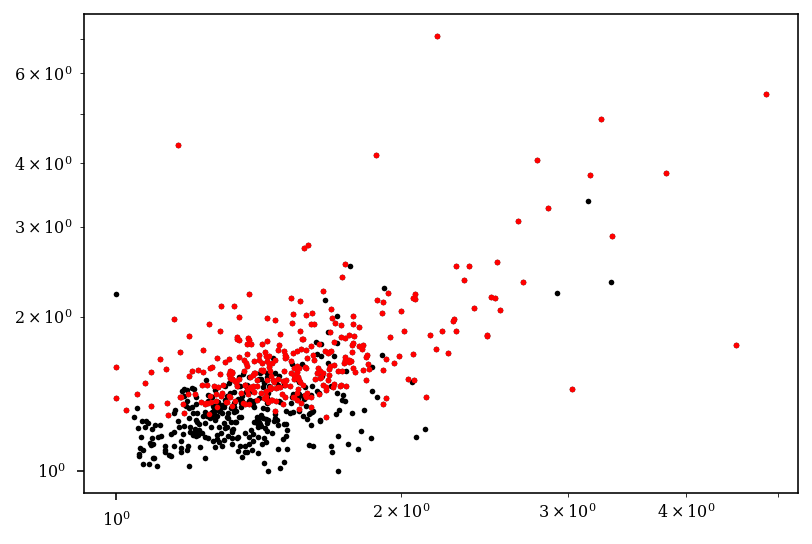

In [519]:
# plt.figure(figsize=(20,3))
# plt.plot(clf.predict_proba(X)[:,0])
# plt.show()

# plt.figure(figsize=(3,3))
# plt.hist(clf.predict_proba(X)[:,0],50)
# plt.show()

prob_idx = clf.predict_proba(X)[:,0]>.5
# prob_idx = clf.decision_function(X)>.5

X1 = swr_unit_metric[(swr_unit_metric.epoch=="pre") & cell_idx][["particip","FRall","FRparticip","nSpkAll","nSpkParticip"]].values
bad_idx = np.any(np.isnan(X1),axis=1) | np.any(np.isinf(X1),axis=1)
X1 = X1[~bad_idx,:]

X2 = swr_unit_metric[(swr_unit_metric.epoch=="post") & cell_idx][["particip","FRall","FRparticip","nSpkAll","nSpkParticip"]].values
bad_idx = np.any(np.isnan(X2),axis=1) | np.any(np.isinf(X2),axis=1)
X2 = X2[~bad_idx,:]

var_n = 4
plt.plot(X1[:,var_n],X2[:,var_n],'.k')
plt.plot(X1[prob_idx,var_n],X2[prob_idx,var_n],'.r')
plt.xscale("log")
plt.yscale("log")
# plt.xlim(0,1)
# plt.ylim(0,1)

# plt.plot(swr_unit_metric[(swr_unit_metric.epoch=="pre") & cell_idx].particip[prob_idx],
#     swr_unit_metric[(swr_unit_metric.epoch=="post") & cell_idx].particip[prob_idx],'.r')    

In [491]:
# from scipy.special import expit

# loss = expit(X * clf.coef_ + clf.intercept_)
# loss.shape
# plt.plot(X[:,0], loss[:,0], color="red", linewidth=3)


# # and plot the result
# plt.figure(1, figsize=(4, 3))
# plt.clf()
# plt.scatter(X.ravel(), y, color="black", zorder=20)
# X_test = np.linspace(-5, 10, 300)

# loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
# plt.plot(X_test, loss, color="red", linewidth=3)

In [318]:
def get_ratio(x1,x2):
    min_val = np.nanmin(np.hstack([x1,x2]))
    if min_val < 0:
        x1 = x1 + np.abs(min_val) + np.finfo(np.float32).eps
        x2 = x2 + np.abs(min_val) + np.finfo(np.float32).eps
    return (x2 - x1) / (x1 + x2)
    # return x2-x1

def get_ratio_var_helper(df,var,cond1,cond2):
    return get_ratio(df[df.epoch == cond1][var].values,df[df.epoch == cond2][var].values)

particip_pre_task = get_ratio_var_helper(swr_unit_metric,"particip","pre","task")
particip_pre_post = get_ratio_var_helper(swr_unit_metric,"particip","pre","post")

FRall_pre_task = get_ratio_var_helper(swr_unit_metric,"FRall","pre","task")
FRall_pre_post = get_ratio_var_helper(swr_unit_metric,"FRall","pre","post")

FRparticip_pre_task = get_ratio_var_helper(swr_unit_metric,"FRparticip","pre","task")
FRparticip_pre_post = get_ratio_var_helper(swr_unit_metric,"FRparticip","pre","post")

nSpkAll_pre_task = get_ratio_var_helper(swr_unit_metric,"nSpkAll","pre","task")
nSpkAll_pre_post = get_ratio_var_helper(swr_unit_metric,"nSpkAll","pre","post")

nSpkParticip_pre_task = get_ratio_var_helper(swr_unit_metric,"nSpkParticip","pre","task")
nSpkParticip_pre_post = get_ratio_var_helper(swr_unit_metric,"nSpkParticip","pre","post")

swr_unit_metric_ratio = pd.DataFrame()
swr_unit_metric_ratio["basepath"] = np.hstack(
                                            [swr_unit_metric[swr_unit_metric.epoch == "pre"].basepath,
                                            swr_unit_metric[swr_unit_metric.epoch == "pre"].basepath])

swr_unit_metric_ratio["group"] = np.hstack(
                                        [swr_unit_metric[swr_unit_metric.epoch == "pre"].deepSuperficial,
                                        swr_unit_metric[swr_unit_metric.epoch == "pre"].deepSuperficial])

swr_unit_metric_ratio['ratio'] = (["pre_task"]*len(swr_unit_metric[swr_unit_metric.epoch == "pre"].deepSuperficial) +
                                    ["pre_post"]*len(swr_unit_metric[swr_unit_metric.epoch == "pre"].deepSuperficial))

swr_unit_metric_ratio['putativeCellType'] = np.hstack(
                                        [swr_unit_metric[swr_unit_metric.epoch == "pre"].putativeCellType,
                                        swr_unit_metric[swr_unit_metric.epoch == "pre"].putativeCellType])

swr_unit_metric_ratio['rem_shifting'] = np.hstack(
                                        [swr_unit_metric[swr_unit_metric.epoch == "pre"].rem_shifting,
                                        swr_unit_metric[swr_unit_metric.epoch == "pre"].rem_shifting])

swr_unit_metric_ratio["particip"] = np.hstack([np.hstack(particip_pre_task),np.hstack(particip_pre_post)])
swr_unit_metric_ratio["FRall"] = np.hstack([np.hstack(FRall_pre_task),np.hstack(FRall_pre_post)])
swr_unit_metric_ratio["FRparticip"] = np.hstack([np.hstack(FRparticip_pre_task),np.hstack(FRparticip_pre_post)])
swr_unit_metric_ratio["nSpkAll"] = np.hstack([np.hstack(nSpkAll_pre_task),np.hstack(nSpkAll_pre_post)])
swr_unit_metric_ratio["nSpkParticip"] = np.hstack([np.hstack(nSpkParticip_pre_task),np.hstack(nSpkParticip_pre_post)])

swr_unit_metric_ratio.head()

,basepath,group,ratio,putativeCellType,rem_shifting,particip,FRall,FRparticip,nSpkAll,nSpkParticip
0,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,Deep,pre_task,Pyramidal Cell,shifting,-0.496620,-0.562781,-0.089080,-0.571701,-0.104850
1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,Deep,pre_task,Pyramidal Cell,shifting,-0.135662,-0.194333,-0.055702,-0.206956,-0.073354
2,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,Deep,pre_task,Pyramidal Cell,shifting,-0.255954,-0.348042,-0.104907,-0.359547,-0.114092
3,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,Deep,pre_task,Pyramidal Cell,shifting,0.156780,0.194375,0.025242,0.181688,0.025638
4,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,Deep,pre_task,Pyramidal Cell,shifting,0.409774,0.408287,-0.009072,0.397269,-0.014937


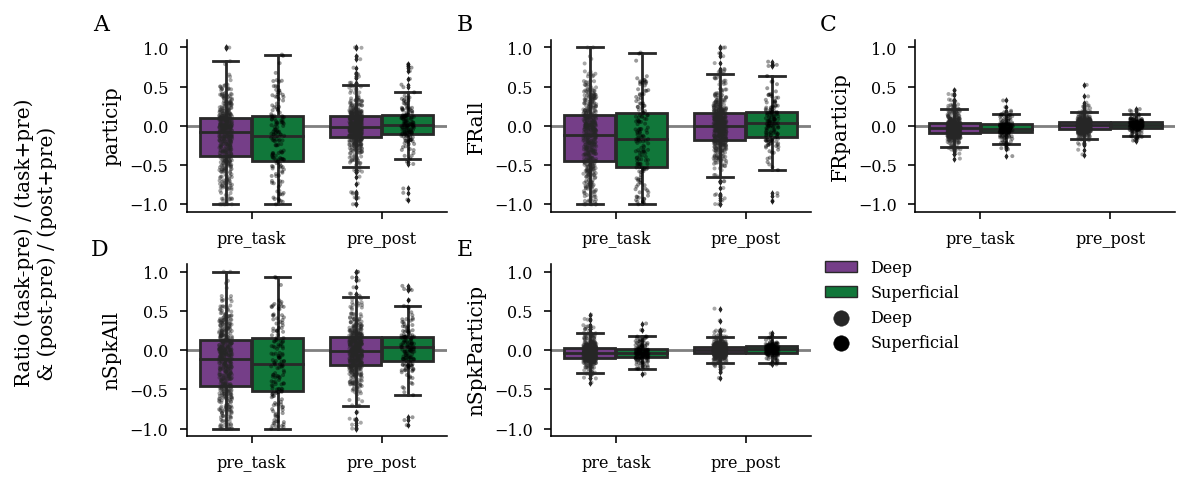

In [321]:
def plot_the_box(df,x,y,hue,group_colors,ax):
    sns.boxplot(x=x, y=y, data=df,fliersize=1,hue=hue,
                 ax=ax,hue_order=group_colors.keys())

    sns.stripplot(x=x, y=y, data=df,
                size=2,color="k", linewidth=0,ax=ax,hue=hue,
                alpha=.4,dodge=True,hue_order=group_colors.keys())
    ax.axhline(0,color='grey',zorder=-1000)

fig, axs = plt.subplots(2,3, figsize=functions.set_size('thesis', fraction=1.5, subplots=(2, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace=.4)
axs = axs.ravel()

group_colors = {"Deep": '#7b3294',
            'Superficial': '#008837'} 
sns.set_palette(sns.color_palette(group_colors.values()))

idx = (swr_unit_metric_ratio.putativeCellType=="Pyramidal Cell")

plot_the_box(swr_unit_metric_ratio[idx],"ratio", "particip","group",group_colors,axs[0])
plot_the_box(swr_unit_metric_ratio[idx],"ratio", "FRall","group",group_colors,axs[1])
plot_the_box(swr_unit_metric_ratio[idx],"ratio", "FRparticip","group",group_colors,axs[2])
plot_the_box(swr_unit_metric_ratio[idx],"ratio", "nSpkAll","group",group_colors,axs[3])
plot_the_box(swr_unit_metric_ratio[idx],"ratio", "nSpkParticip","group",group_colors,axs[4])

axs[0].legend([],[], frameon=False)
axs[1].legend([],[], frameon=False)
axs[2].legend([],[], frameon=False)
axs[3].legend([],[], frameon=False)

for i in range(6):
    axs[i].set_ylim(-1.1,1.1)
    axs[i].set_xlabel('')
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)

axs[5].set_visible(False)

fig.text(-.01, 0.5,
        'Ratio (task-pre) / (task+pre) \n & (post-pre) / (post+pre)',
        va='center', rotation='vertical')

for i, label in enumerate(('A','B', 'C', 'D','E')):
    axs[i].text(-0.3, 1.15, label, transform=axs[i].transAxes,
        fontsize=11, fontweight='normal', va='top', ha='right')
      
axs[4].legend(bbox_to_anchor=(1, 0.01, 0.5, 1.1),frameon=False)

# plt.savefig(os.path.join(fig_save_path,'novel_task_pre_task_post_ratio.pdf'),dpi=300,bbox_inches='tight')

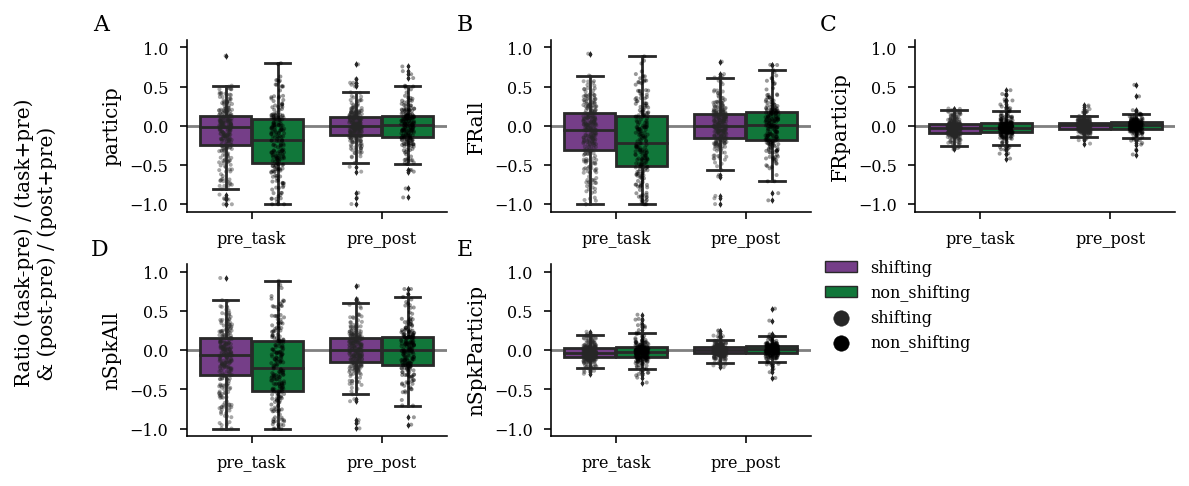

In [323]:
fig, axs = plt.subplots(2,3, figsize=functions.set_size('thesis', fraction=1.5, subplots=(2, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace=.4)
axs = axs.ravel()

group_colors = {"shifting": '#7b3294',
            'non_shifting': '#008837'} 
sns.set_palette(sns.color_palette(group_colors.values()))

idx = (swr_unit_metric_ratio.putativeCellType=="Pyramidal Cell")

plot_the_box(swr_unit_metric_ratio[idx],"ratio", "particip","rem_shifting",group_colors,axs[0])
plot_the_box(swr_unit_metric_ratio[idx],"ratio", "FRall","rem_shifting",group_colors,axs[1])
plot_the_box(swr_unit_metric_ratio[idx],"ratio", "FRparticip","rem_shifting",group_colors,axs[2])
plot_the_box(swr_unit_metric_ratio[idx],"ratio", "nSpkAll","rem_shifting",group_colors,axs[3])
plot_the_box(swr_unit_metric_ratio[idx],"ratio", "nSpkParticip","rem_shifting",group_colors,axs[4])

axs[0].legend([],[], frameon=False)
axs[1].legend([],[], frameon=False)
axs[2].legend([],[], frameon=False)
axs[3].legend([],[], frameon=False)

for i in range(6):
    axs[i].set_ylim(-1.1,1.1)
    axs[i].set_xlabel('')
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)

axs[5].set_visible(False)

fig.text(-.01, 0.5,
        'Ratio (task-pre) / (task+pre) \n & (post-pre) / (post+pre)',
        va='center', rotation='vertical')

for i, label in enumerate(('A','B', 'C', 'D','E')):
    axs[i].text(-0.3, 1.15, label, transform=axs[i].transAxes,
        fontsize=11, fontweight='normal', va='top', ha='right')
      
axs[4].legend(bbox_to_anchor=(1, 0.01, 0.5, 1.1),frameon=False)

# plt.savefig(os.path.join(fig_save_path,'novel_task_pre_task_post_ratio.pdf'),dpi=300,bbox_inches='tight')

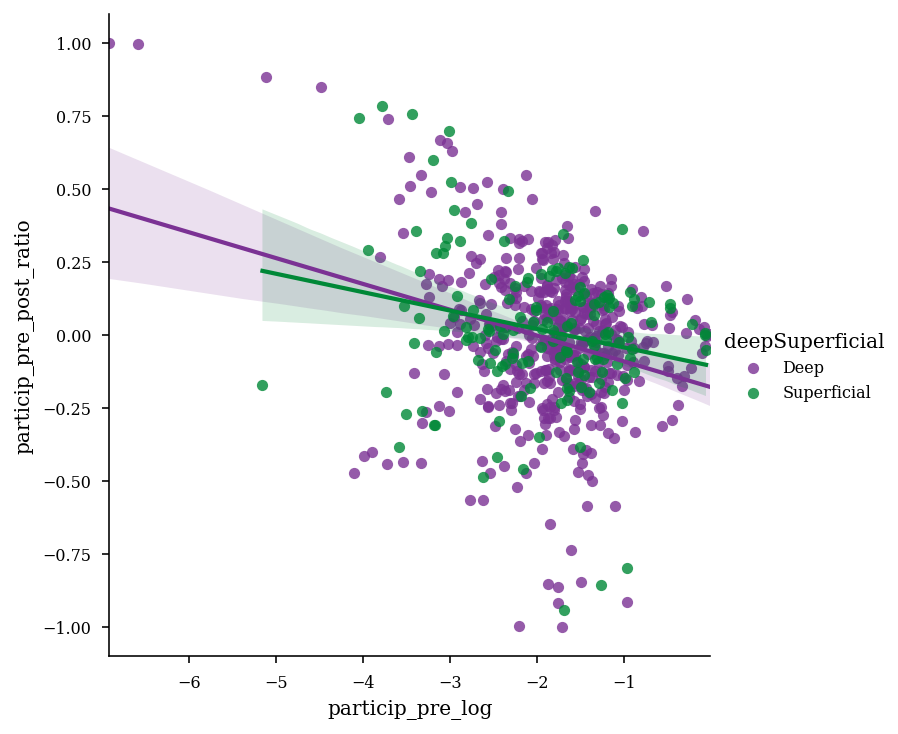

In [327]:
mixed_df = pd.DataFrame()
mixed_df['particip_pre'] = swr_unit_metric.particip[swr_unit_metric.epoch=="pre"].values
mixed_df['particip_pre_post_ratio'] = swr_unit_metric_ratio.particip[swr_unit_metric_ratio.ratio == "pre_post"].values
mixed_df['deepSuperficial'] = swr_unit_metric.deepSuperficial[swr_unit_metric.epoch=="pre"].values
mixed_df['rem_shifting'] = swr_unit_metric.rem_shifting[swr_unit_metric.epoch=="pre"].values

mixed_df["particip_pre"] = mixed_df['particip_pre'] + 0.001

mixed_df['particip_pre_log'] = np.log(mixed_df['particip_pre'])

group_colors = {"Deep": '#7b3294',
            'Superficial': '#008837'} 
sns.set_palette(sns.color_palette(group_colors.values()))

sns.lmplot(x="particip_pre_log", y="particip_pre_post_ratio",
                hue="deepSuperficial",
                hue_order=group_colors.keys(),
                data=mixed_df)

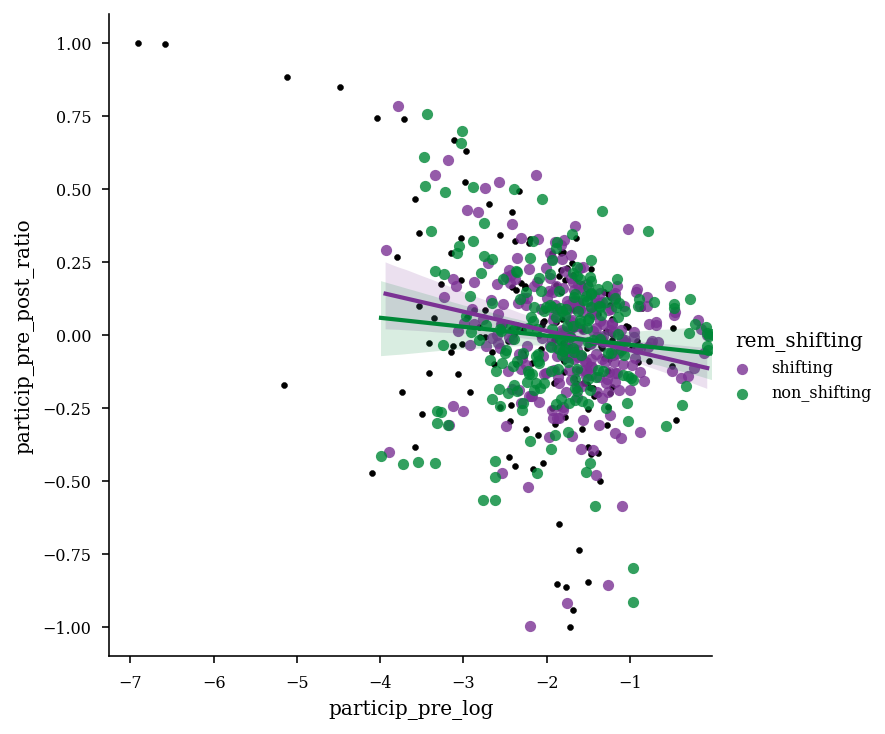

In [343]:
group_colors = {"shifting": '#7b3294',
            'non_shifting': '#008837'} 
sns.set_palette(sns.color_palette(group_colors.values()))

sns.lmplot(x="particip_pre_log", y="particip_pre_post_ratio",
                hue="rem_shifting",
                hue_order=group_colors.keys(),
                data=mixed_df)
plt.scatter(mixed_df[mixed_df.rem_shifting.isna()].particip_pre_log, 
            mixed_df[mixed_df.rem_shifting.isna()].particip_pre_post_ratio,
            color="k",zorder=-1000,s=9)
                

0.014118026248390647
[-0.22093087]
0.04300942819394073


Text(0, 0.5, 'pre to post FRall ratio')

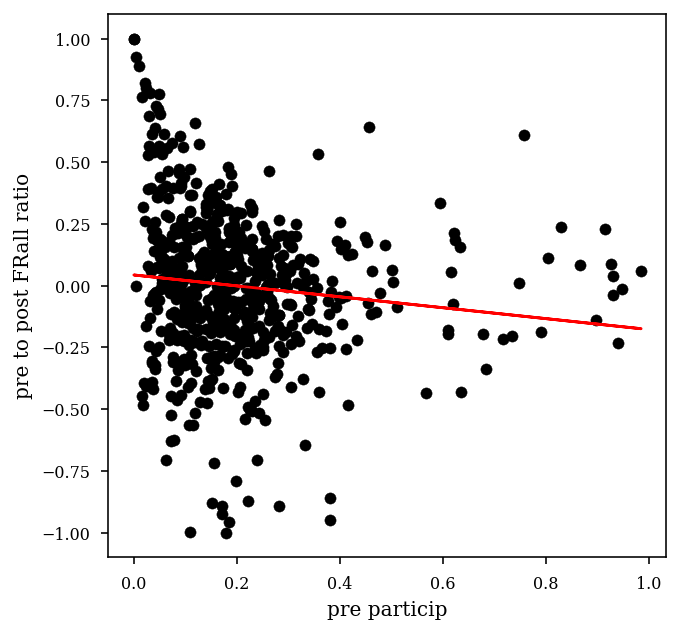

In [331]:
from sklearn.linear_model import LinearRegression
X = swr_unit_metric.particip[swr_unit_metric.epoch=="pre"].values
y = swr_unit_metric_ratio[swr_unit_metric_ratio.ratio == "pre_post"].FRall.values
X = np.expand_dims(X, axis=1)

# X = X + 0.001
# X = np.log10(X)

# y = np.abs(y)
# y = np.log10(y)

reg = LinearRegression().fit(X, y)
reg
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

plt.figure(figsize=(5,5))
plt.scatter(X,y,color="k")
plt.plot(X,X*reg.coef_+reg.intercept_,color="r")
plt.xlabel("pre particip")
plt.ylabel("pre to post FRall ratio")

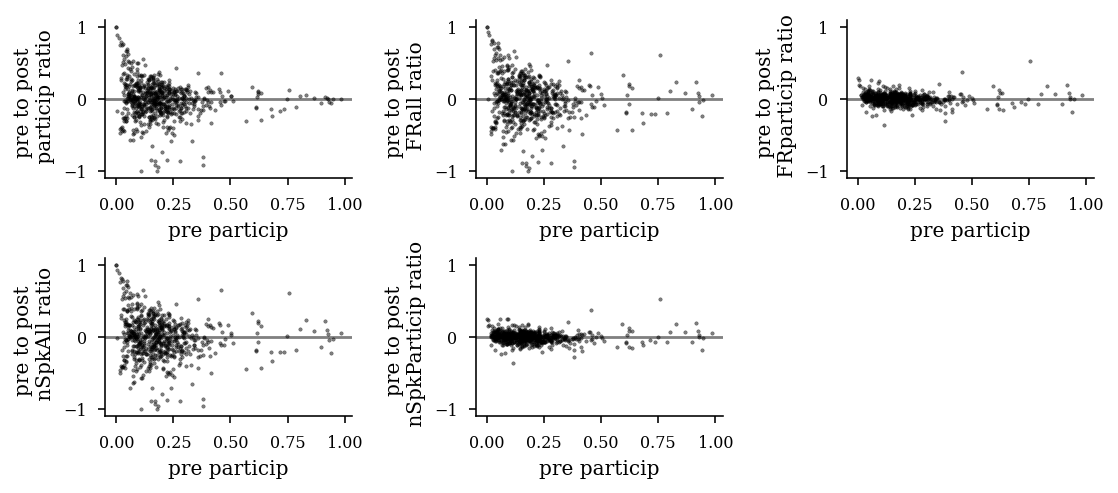

In [312]:
swr_unit_metric_ratio = swr_unit_metric_ratio[swr_unit_metric_ratio.putativeCellType == "Pyramidal Cell"]
swr_unit_metric = swr_unit_metric[swr_unit_metric.putativeCellType == "Pyramidal Cell"]

fig, axs = plt.subplots(2,3, figsize=functions.set_size('thesis', fraction=1.5, subplots=(2, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=.5)
axs = axs.ravel()

axs[0].scatter(swr_unit_metric.particip[swr_unit_metric.epoch=="pre"],swr_unit_metric_ratio[swr_unit_metric_ratio.ratio == "pre_post"].particip,color="k",alpha=.5,s=3)
axs[0].set_xlabel("pre particip")
axs[0].set_ylabel("pre to post \n particip ratio")
# axs[0].set_xscale("log")

axs[1].scatter(swr_unit_metric.particip[swr_unit_metric.epoch=="pre"],swr_unit_metric_ratio[swr_unit_metric_ratio.ratio == "pre_post"].FRall,color="k",alpha=.5,s=3)
axs[1].set_xlabel("pre particip")
axs[1].set_ylabel("pre to post \n FRall ratio")
# axs[1].set_xscale("log")

axs[2].scatter(swr_unit_metric.particip[swr_unit_metric.epoch=="pre"],swr_unit_metric_ratio[swr_unit_metric_ratio.ratio == "pre_post"].FRparticip,color="k",alpha=.5,s=3)
axs[2].set_xlabel("pre particip")
axs[2].set_ylabel("pre to post \n FRparticip ratio")

axs[3].scatter(swr_unit_metric.particip[swr_unit_metric.epoch=="pre"],swr_unit_metric_ratio[swr_unit_metric_ratio.ratio == "pre_post"].nSpkAll,color="k",alpha=.5,s=3)
axs[3].set_xlabel("pre particip")
axs[3].set_ylabel("pre to post \n nSpkAll ratio")

axs[4].scatter(swr_unit_metric.particip[swr_unit_metric.epoch=="pre"],swr_unit_metric_ratio[swr_unit_metric_ratio.ratio == "pre_post"].nSpkParticip,color="k",alpha=.5,s=3)
axs[4].set_xlabel("pre particip")
axs[4].set_ylabel("pre to post \n nSpkParticip ratio")

for i in range(6):
    axs[i].set_ylim(-1.1,1.1)
    axs[i].axhline(0,color='grey',zorder=-1000)
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)

axs[5].set_visible(False)

plt.savefig(os.path.join(fig_save_path,'novel_task_pre_post_ratio_compar_pre_particip.pdf'),dpi=300,bbox_inches='tight')


(-0.2, 0.3)

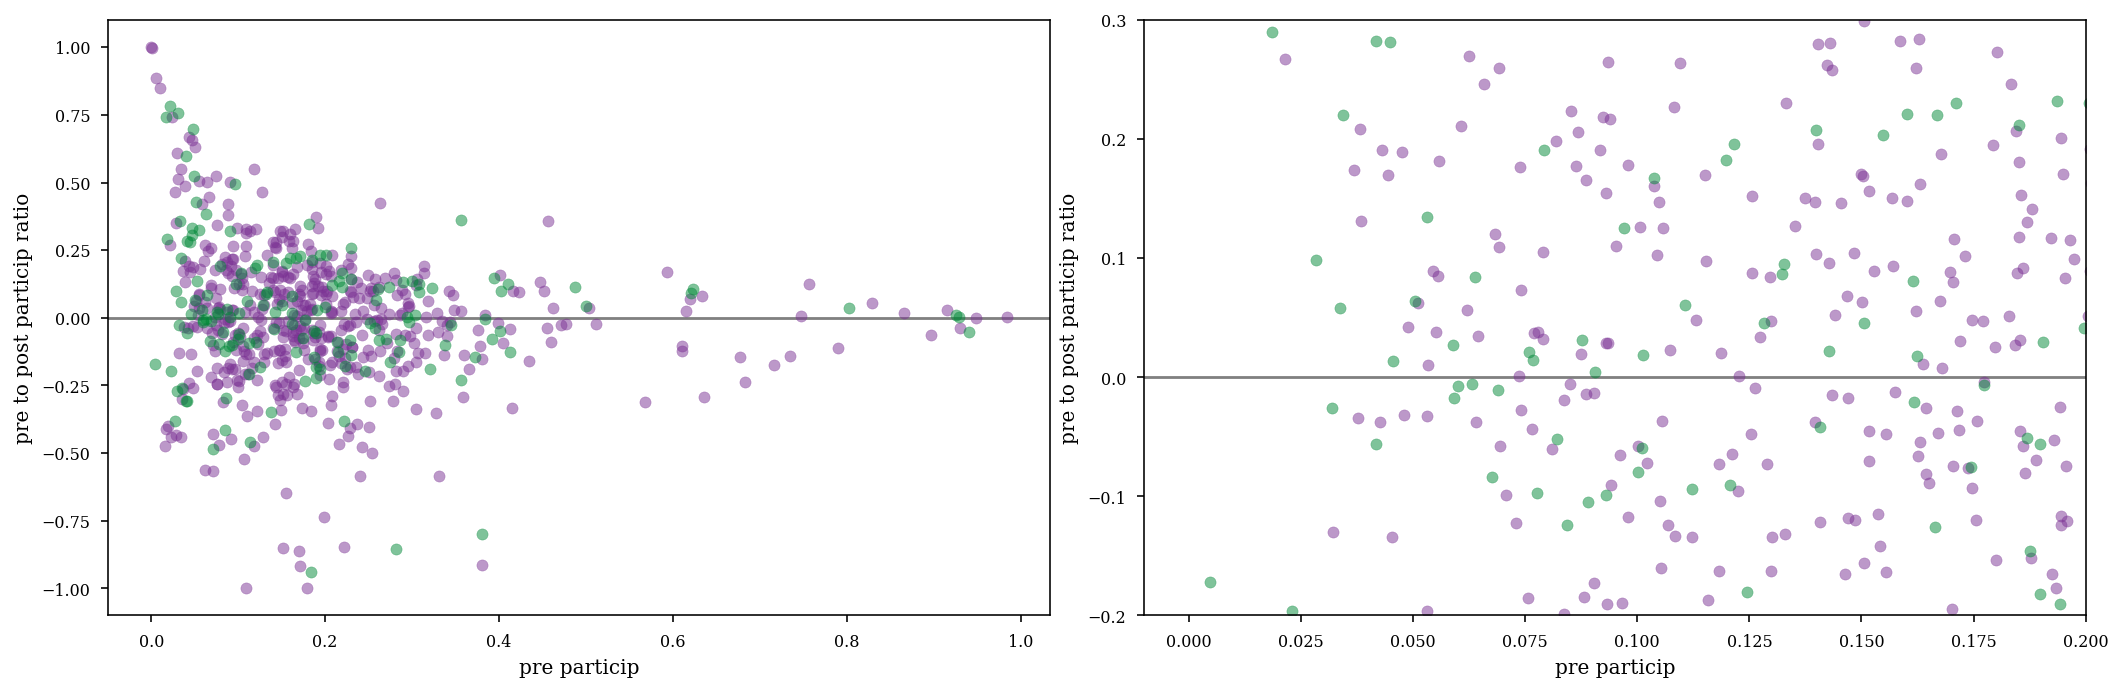

In [217]:
fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=3, subplots=(1, 2)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=.1)
axs = axs.ravel()

group_colors = {"Deep": '#7b3294',
            'Superficial': '#008837'} 

axs[0].scatter(swr_unit_metric[(swr_unit_metric.epoch=="pre") & (swr_unit_metric.deepSuperficial=="Deep")].particip,
                swr_unit_metric_ratio[(swr_unit_metric_ratio.ratio == "pre_post") & (swr_unit_metric_ratio.group=="Deep")].particip,
                color="#7b3294",
                alpha=.5)

axs[0].scatter(swr_unit_metric[(swr_unit_metric.epoch=="pre") & (swr_unit_metric.deepSuperficial=="Superficial")].particip,
                swr_unit_metric_ratio[(swr_unit_metric_ratio.ratio == "pre_post") & (swr_unit_metric_ratio.group=="Superficial")].particip,
                color="#008837",
                alpha=.5)

axs[0].axhline(0,color='grey',zorder=-1000)
axs[0].set_xlabel("pre particip")
axs[0].set_ylabel("pre to post particip ratio")

axs[1].scatter(swr_unit_metric[(swr_unit_metric.epoch=="pre") & (swr_unit_metric.deepSuperficial=="Deep")].particip,
                swr_unit_metric_ratio[(swr_unit_metric_ratio.ratio == "pre_post") & (swr_unit_metric_ratio.group=="Deep")].particip,
                color="#7b3294",
                alpha=.5)

axs[1].scatter(swr_unit_metric[(swr_unit_metric.epoch=="pre") & (swr_unit_metric.deepSuperficial=="Superficial")].particip,
                swr_unit_metric_ratio[(swr_unit_metric_ratio.ratio == "pre_post") & (swr_unit_metric_ratio.group=="Superficial")].particip,
                color="#008837",
                alpha=.5)
axs[1].axhline(0,color='grey',zorder=-1000)
axs[1].set_xlabel("pre particip")
axs[1].set_ylabel("pre to post particip ratio")
axs[1].set_xlim(-.01,.2)
axs[1].set_ylim(-.2,.3)

(0.0961725276860307, 0.2490388722768048)

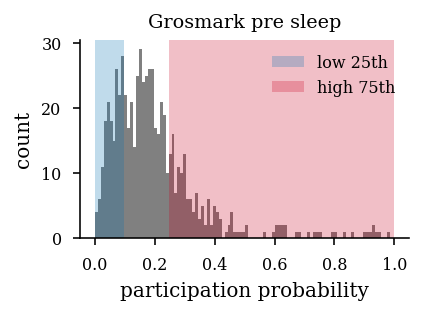

In [176]:
x = swr_unit_metric[(swr_unit_metric.epoch=="pre") & (swr_unit_metric.putativeCellType=="Pyramidal Cell")].particip.values
plt.figure(figsize=functions.set_size('thesis', fraction=.5, subplots=(1, 1)))
plt.hist(x,100,color='grey')
plt.axvspan(0,np.percentile(x, 25), facecolor='#0571b0', alpha=0.25,label="low 25th")
plt.axvspan(np.percentile(x, 75), 1, facecolor='#ca0020', alpha=0.25,label="high 75th")
plt.xlabel('participation probability')
plt.ylabel('count')
plt.title("Grosmark pre sleep")

ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.legend(frameon=False)

plt.savefig(os.path.join(fig_save_path,'participation_hist_presleep_percentile.pdf'),dpi=300,bbox_inches='tight')


np.percentile(x, 25),np.percentile(x, 75)